In [1]:
import sys
sys.path.append("../")
import spopt


exact solver


In [2]:
import geopandas as gpd

In [3]:
gdf = gpd.read_file('../spopt/data/n100.shp')

In [4]:
gdf.head()

,ID,SAR1,Uniform2,geometry
0,0.0,-1.039542,14.817274,"POLYGON ((0.000 100.000, 10.000 100.000, 10.00..."
1,1.0,-0.587864,11.454981,"POLYGON ((10.000 100.000, 20.000 100.000, 20.0..."
2,2.0,0.853925,12.829352,"POLYGON ((20.000 100.000, 30.000 100.000, 30.0..."
3,3.0,1.520132,12.445755,"POLYGON ((30.000 100.000, 40.000 100.000, 40.0..."
4,4.0,0.949061,10.322907,"POLYGON ((40.000 100.000, 50.000 100.000, 50.0..."


In [5]:
from spopt import MaxPHeuristic as MaxP

In [6]:
import libpysal

In [7]:
w = libpysal.weights.Rook.from_dataframe(gdf)

In [8]:
attrs_name = ['SAR1']
threshold_name = 'Uniform2'
threshold = 100
top_n = 2


In [9]:
model = MaxP(gdf, w, attrs_name, threshold_name, threshold, top_n)

In [10]:
model

In [11]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'attrs_name',
 'gdf',
 'max_iterations_construction',
 'max_iterations_sa',
 'solve',
 'threshold',
 'threshold_name',
 'top_n',
 'verbose',
 'w']

In [12]:
model.verbose

False

In [13]:
model.solve()

In [14]:
model.p

11

In [15]:
model.labels_

[11,
 11,
 11,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 2,
 11,
 11,
 11,
 11,
 3,
 3,
 3,
 6,
 6,
 2,
 11,
 7,
 7,
 7,
 3,
 6,
 3,
 6,
 1,
 2,
 2,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 1,
 2,
 2,
 2,
 7,
 12,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 12,
 12,
 12,
 4,
 4,
 1,
 1,
 1,
 8,
 8,
 8,
 12,
 12,
 12,
 4,
 4,
 5,
 1,
 8,
 8,
 8,
 8,
 12,
 4,
 4,
 4,
 5,
 5,
 10,
 10,
 8,
 8,
 12,
 4,
 4,
 5,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5]

In [16]:
gdf['region11'] = model.labels_
gdf.to_file('region11.shp')

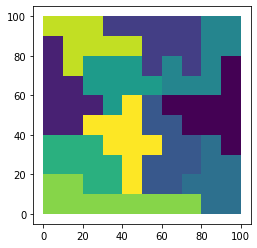

In [17]:
%matplotlib inline
gdf.plot(column='region11')

## Mexican State Regional Income Clustering

Cluster 32 Mexican states into the maximum number of regions such that each region as at least 4 states and homegeneity in per-captia gross regional product over 1950-2000 is maximized.

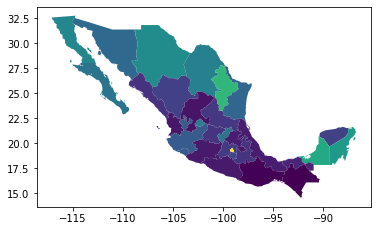

In [18]:
pth = libpysal.examples.get_path('mexicojoin.shp')

mexico = gpd.read_file(pth)

mexico.plot(column='PCGDP2000')

In [19]:
mexico['count'] = 1

In [20]:
mexico.columns

Index(['POLY_ID', 'AREA', 'CODE', 'NAME', 'PERIMETER', 'ACRES', 'HECTARES',
       'PCGDP1940', 'PCGDP1950', 'PCGDP1960', 'PCGDP1970', 'PCGDP1980',
       'PCGDP1990', 'PCGDP2000', 'HANSON03', 'HANSON98', 'ESQUIVEL99', 'INEGI',
       'INEGI2', 'MAXP', 'GR4000', 'GR5000', 'GR6000', 'GR7000', 'GR8000',
       'GR9000', 'LPCGDP40', 'LPCGDP50', 'LPCGDP60', 'LPCGDP70', 'LPCGDP80',
       'LPCGDP90', 'LPCGDP00', 'TEST', 'geometry', 'count'],
      dtype='object')

In [21]:
attrs_name = [f'PCGDP{year}' for year in range(1950,2010, 10)]

In [22]:
attrs_name

['PCGDP1950', 'PCGDP1960', 'PCGDP1970', 'PCGDP1980', 'PCGDP1990', 'PCGDP2000']

In [23]:
w = libpysal.weights.Queen.from_dataframe(mexico)
threshold = 4
top_n = 2
threshold_name = 'count'

In [24]:
import numpy
numpy.random.seed(123456)
model = MaxP(mexico, w, attrs_name, threshold_name, threshold, top_n)

In [25]:
model.solve()

In [26]:
model.labels_

[5,
 5,
 3,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 8,
 6,
 8,
 2,
 2,
 8,
 2,
 8,
 7,
 7,
 2,
 7,
 5,
 3,
 3,
 5,
 3,
 4,
 4,
 4,
 4,
 7]

In [27]:
mexico['maxp_new'] = model.labels_

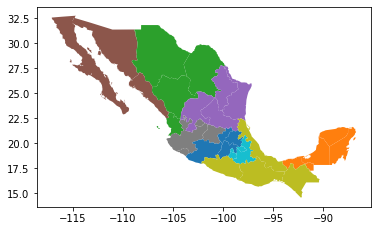

In [28]:
mexico.plot(column='maxp_new', categorical=True)

In [29]:
mexico.groupby(by='maxp_new').count()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry,count
maxp_new,,,,,,,,,,,,,,,,,,,,,
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [30]:
threshold = 3
numpy.random.seed(123456)
model = MaxP(mexico, w, attrs_name, threshold_name, threshold, top_n)
model.solve()

In [31]:
mexico['maxp_3'] = model.labels_
mexico.groupby(by='maxp_3').count()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry,count,maxp_new
maxp_3,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
9,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


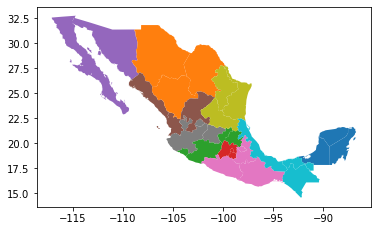

In [32]:
mexico.plot(column='maxp_3', categorical=True)